# 多分类问题中的混淆矩阵

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [5]:
from sklearn.model_selection._split import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=666)

In [6]:
from sklearn.linear_model.logistic import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.93115438108484005

In [7]:
y_predict =log_reg.predict(X_test)

## 多分类问题求精准率

In [8]:
from sklearn.metrics.scorer import precision_score

precision_score(y_test, y_predict)

ValueError: Target is multiclass but average='binary'. Please choose another average setting.

默认参数average='binary'，只能解决二分类问题

In [9]:
# average设为None就只返回分数？
precision_score(y_test, y_predict, average=None)

array([ 0.97350993,  0.86013986,  0.96402878,  0.92      ,  0.9858156 ,
        0.9125    ,  1.        ,  0.93617021,  0.8778626 ,  0.88741722])

In [10]:
precision_score(y_test, y_predict, average='micro')

0.93115438108484005

## 混淆矩阵天然支持多分类问题

In [13]:
from sklearn.metrics.classification import confusion_matrix

confusion_matrix(y_test, y_predict)

array([[147,   0,   1,   0,   0,   1,   0,   0,   0,   0],
       [  0, 123,   1,   2,   0,   0,   0,   3,   4,  10],
       [  0,   0, 134,   1,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 138,   0,   5,   0,   1,   5,   0],
       [  2,   5,   0,   0, 139,   0,   0,   3,   0,   1],
       [  1,   3,   1,   0,   0, 146,   0,   0,   1,   0],
       [  0,   2,   0,   0,   0,   1, 131,   0,   2,   0],
       [  0,   0,   0,   1,   0,   0,   0, 132,   1,   2],
       [  1,   9,   2,   3,   2,   4,   0,   0, 115,   4],
       [  0,   1,   0,   5,   0,   3,   0,   2,   2, 134]])

### 一种直观的发现什么地方犯错较多的方法

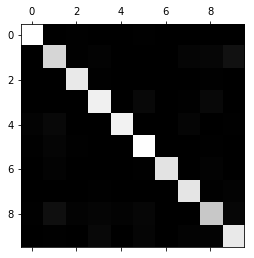

In [14]:
cfm = confusion_matrix(y_test, y_predict)
plt.matshow(cfm, cmap=plt.cm.gray)  # 映射为一个矩阵排列的灰度图？
plt.show()

### 最亮的地方就是（样本）数目比较大的地方，图中的对角线就对应着评估正确的样本，不过我们的关注重点不在预测正确的部分，而是关注哪里预测错了

In [15]:
# 每一行有多少个样本
row_sums = np.sum(cfm, axis=1)

# 每一格就是占比
err_matrix = cfm / row_sums

# 很明显，对角线上的数是最大的，但我们并不关心对角线上的数（因为都是正确的）
# 我们把对角线全变为0
np.fill_diagonal(err_matrix, 0)

err_matrix

array([[ 0.        ,  0.        ,  0.00735294,  0.        ,  0.        ,
         0.00657895,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.00735294,  0.01342282,  0.        ,
         0.        ,  0.        ,  0.02205882,  0.02857143,  0.06802721],
       [ 0.        ,  0.        ,  0.        ,  0.00671141,  0.        ,
         0.        ,  0.        ,  0.        ,  0.00714286,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.03289474,  0.        ,  0.00735294,  0.03571429,  0.        ],
       [ 0.01342282,  0.03496503,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.02205882,  0.        ,  0.00680272],
       [ 0.00671141,  0.02097902,  0.00735294,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.00714286,  0.        ],
       [ 0.        ,  0.01398601,  0.        ,  0.        ,  0.        ,
         0.00657895,  0.        ,  0.        

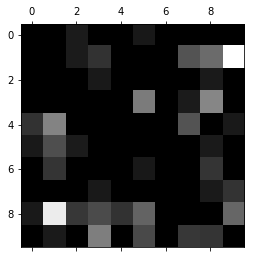

In [16]:
plt.matshow(err_matrix, cmap=plt.cm.gray)  # 映射为一个矩阵排列的灰度图？
plt.show()

越亮的位置就是犯错越多的位置